`imports`, you've seen this before!

In [98]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gpd
import geopandas as gp
import shapely
import fiona


shp_file_name = "/Users/sylvia/Downloads/GDA2020/nsw_localities.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = (
    "https://data.gov.au/data/dataset/"
    "91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
    "5e295412-357c-49a2-98d5-6caf099c2339/download/"
    "nsw_locality_polygon_shp.zip"
)
if __name__ == "__main__":
    saved_style_state = plt.rcParams.copy()
    if os.path.isfile("../set9/trees-with-species-and-dimensions-urban-forest.csv"):
        filepath = "../set9/trees-with-species-and-dimensions-urban-forest.csv"
        print("Loading from file")
    else:
        filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
        print("Loading from the internet")



Loading from the internet


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [86]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [88]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [89]:
if os.path.isfile("trees-with-species-and-dimensions-urban-forest.csv"):
    filepath = "trees-with-species-and-dimensions-urban-forest.csv"
    print("loading from file")
else:
    filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
    print("loading from the internet")

tdf = pd.read_csv(filepath)
print("done")
#Research Question: What factors influence the size of Diameter Breast Height (DBH) of trees in Melbourne?

loading from file
done


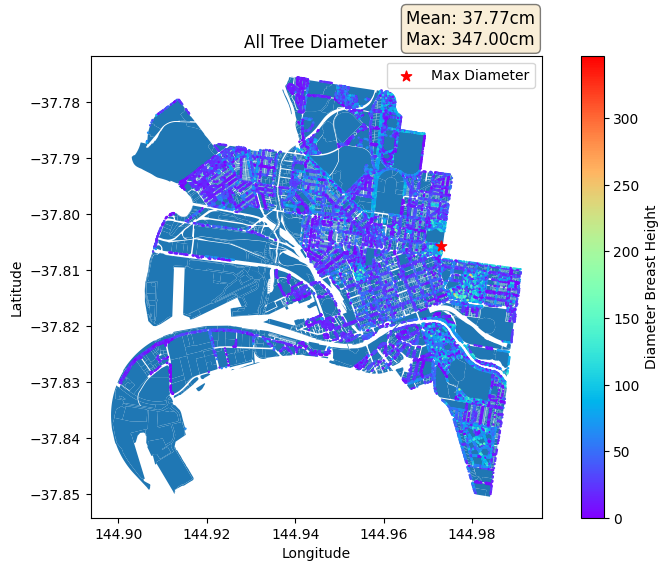

In [95]:
fig0 = plt.figure(figsize=(10, 6), num=1)
fig0_ax1 = fig0.add_subplot(111)
mel_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig0_ax1)
scatter = fig0_ax1.scatter(tdf["Longitude"], tdf["Latitude"],
                               c=tdf["Diameter Breast Height"],
                               cmap="rainbow", s=0.5)
tree_dia_mean = tdf["Diameter Breast Height"].mean()
tree_dia_max = tdf["Diameter Breast Height"].max()
street_max_items = tdf[tdf["Diameter Breast Height"] == tree_dia_max]
fig0_ax1.scatter(street_max_items["Longitude"], street_max_items["Latitude"],
                     c='red', marker="*", s=60, label="Max Diameter")
text_str = f'Mean: {tree_dia_mean:.2f}cm\nMax: {tree_dia_max:.2f}cm'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig0_ax1.text(0.70, 1.1, text_str, transform=fig0_ax1.transAxes, fontsize=12,
                  verticalalignment='top', bbox=props)
fig0_ax1.set_title("All Tree Diameter")
fig0_ax1.set_xlabel("Longitude")
fig0_ax1.set_ylabel("Latitude")
fig0_ax1.legend()
cbar = plt.colorbar(scatter, ax=fig0_ax1)
cbar.set_label('Diameter Breast Height')
plt.show()

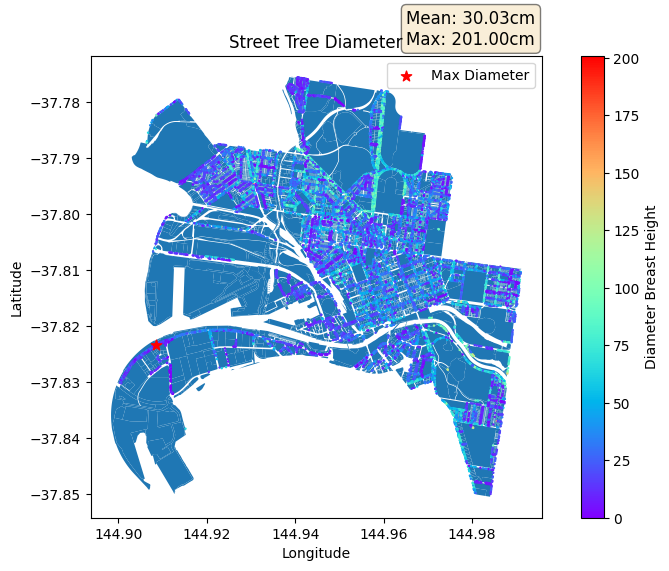

In [52]:
tdf_street = tdf.loc[(tdf["Located in"] == "Street")]
fig1 = plt.figure(figsize=(10, 6), num=2)
fig1_ax1 = fig1.add_subplot(111)
mel_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig1_ax1)
scatter = fig1_ax1.scatter(tdf_street["Longitude"], tdf_street["Latitude"],
                                c=tdf_street["Diameter Breast Height"],
                                cmap="rainbow", s=0.5)
street_tree_dia_mean = tdf_street["Diameter Breast Height"].mean()
street_tree_dia_max = tdf_street["Diameter Breast Height"].max()
street_max_items = tdf_street[(tdf_street["Diameter Breast Height"]) == street_tree_dia_max]
fig1_ax1.scatter(street_max_items["Longitude"], street_max_items["Latitude"], c='red', marker="*", s=60,
                    label="Max Diameter")
text_str = f'Mean: {street_tree_dia_mean:.2f}cm\nMax: {street_tree_dia_max:.2f}cm'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig1_ax1.text(0.70, 1.1, text_str, transform=fig1_ax1.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)
fig1_ax1.set_title("Street Tree Diameter")
fig1_ax1.set_ylabel("Latitude")
fig1_ax1.set_xlabel("Longitude")
fig1_ax1.legend()
cbar = plt.colorbar(scatter, ax=fig1_ax1)
cbar.set_label('Diameter Breast Height')
plt.show()

#Diameter Breast Height (DBH) Size Analysis of Street Trees.

In [53]:
tdf_street.loc[tdf_street["Diameter Breast Height"].idxmax()]

CoM ID                                                         1030802
Common Name                                            Peppercorn Tree
Scientific Name                                          Schinus molle
Genus                                                          Schinus
Family                                                   Anacardiaceae
Diameter Breast Height                                           201.0
Year Planted                                                      1997
Date Planted                                                12/12/1997
Age Description                                                 Mature
Useful Life Expectency                                     31-60 years
Useful Life Expectency Value                                      60.0
Precinct                                                           NaN
Located in                                                      Street
UploadDate                                                   1/10/2021
Coordi

Here is the fattest tree on street


<function matplotlib.pyplot.show(close=None, block=None)>

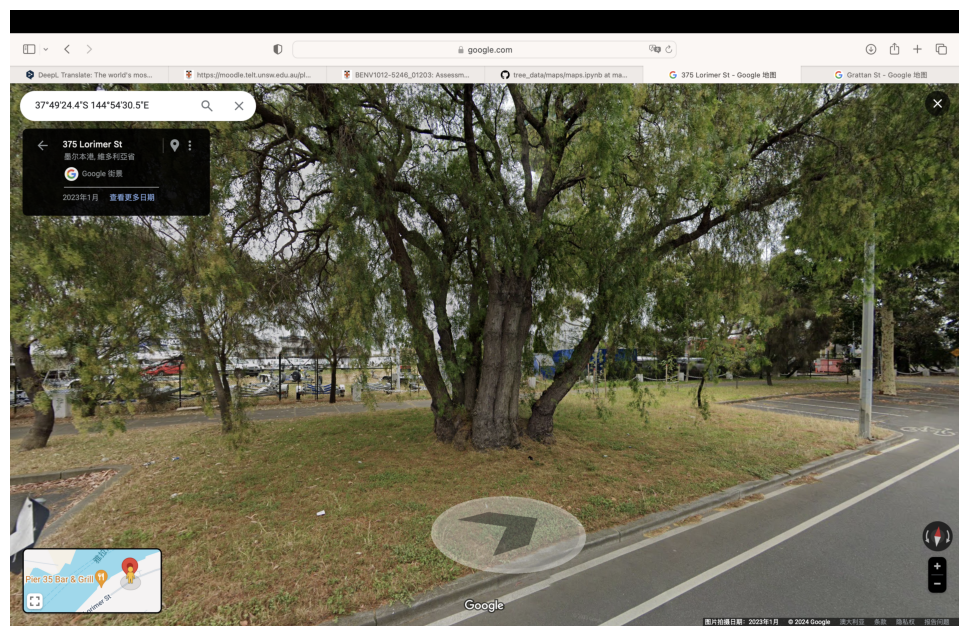

In [54]:
print("Here is the fattest tree on street")
img = mpimg.imread("street_tree.png")
plt. figure(figsize = (15,8))
plt. imshow(img)
plt. axis('off')
plt. show

13940


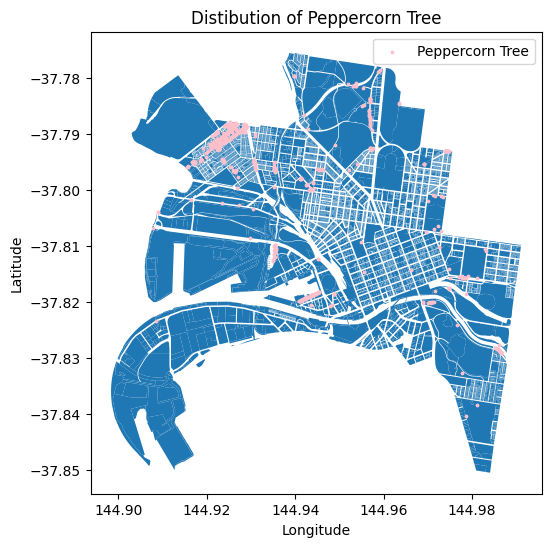

In [55]:
peppercorn_tree_tdf = tdf[tdf['Common Name'] == 'Peppercorn Tree']
print(peppercorn_tree_tdf.size)
fig6 = plt.figure(figsize=(10, 6), num=7)
fig6_ax1 = fig6. add_subplot(111)
mel_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig6_ax1)
fig6_ax1.scatter(peppercorn_tree_tdf['Longitude'], peppercorn_tree_tdf["Latitude"], c='pink', s=3, label='Peppercorn Tree')
fig6_ax1.set_title('Distibution of Peppercorn Tree')
fig6_ax1.set_xlabel('Longitude')
fig6_ax1.set_ylabel('Latitude')
fig6_ax1.legend()
plt.show()


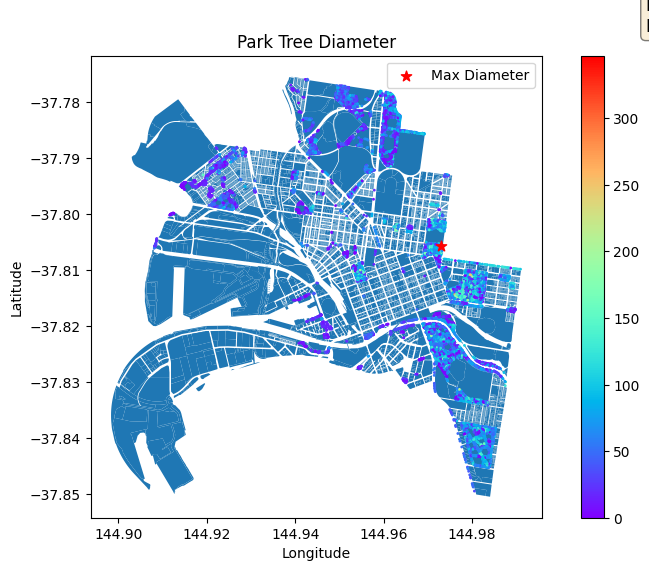

In [56]:
tdf_park = tdf.loc[(tdf["Located in"] == "Park")]
fig2 = plt.figure(figsize=(10, 6), num=3)
fig2_ax1 = fig2.add_subplot(111)
mel_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig2_ax1)
fig2_ax1_sc1 = fig2_ax1.scatter(tdf_park["Longitude"], tdf_park["Latitude"],
                                c=tdf_park["Diameter Breast Height"],
                                cmap="rainbow", s=1)
park_tree_dia_mean = tdf_park["Diameter Breast Height"].mean()
park_tree_dia_max = tdf_park["Diameter Breast Height"].max()
park_max_items = tdf_park[(tdf_park["Diameter Breast Height"]) == park_tree_dia_max]
fig2_ax1.scatter(park_max_items["Longitude"], park_max_items["Latitude"], c='red', marker="*", s=60,
                    label="Max Diameter")
text_str = f'Mean: {park_tree_dia_mean:.2f}cm\nMax: {park_tree_dia_max:.2f}cm'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig2_ax1.text(0.78, 1.1, text_str, transform=fig1_ax1.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)
fig2_ax1.set_title("Park Tree Diameter")
fig2_ax1.set_ylabel("Latitude")
fig2_ax1.set_xlabel("Longitude")
fig2_ax1.legend()
fig2.colorbar(fig2_ax1_sc1, ax=fig2_ax1)
#Diameter Breast Height (DBH) Size Analysis of Park Trees.

In [57]:
tdf_park.loc[tdf_park["Diameter Breast Height"].idxmax()]

CoM ID                                                         1036933
Common Name                                            Moreton Bay Fig
Scientific Name                                      Ficus macrophylla
Genus                                                            Ficus
Family                                                        Moraceae
Diameter Breast Height                                           347.0
Year Planted                                                      1998
Date Planted                                                10/29/1998
Age Description                                                 Mature
Useful Life Expectency                                     21-30 years
Useful Life Expectency Value                                      30.0
Precinct                                                           NaN
Located in                                                        Park
UploadDate                                                   1/10/2021
Coordi

Here's the fattest tree in a park in melboune!

![](park_tree.png)


14060


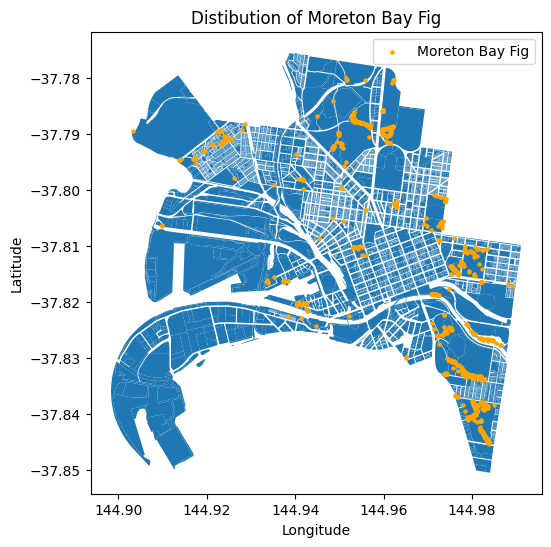

In [58]:
moreton_bay_fig_tdf = tdf[tdf['Common Name'] == 'Moreton Bay Fig']
print(moreton_bay_fig_tdf.size)
fig7 = plt.figure(figsize=(10, 6), num=7)
fig7_ax1 = fig7. add_subplot(111)
el_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig7_ax1)
fig7_ax1.scatter(moreton_bay_fig_tdf['Longitude'], moreton_bay_fig_tdf["Latitude"], c='orange', s=5, label='Moreton Bay Fig')
fig7_ax1.set_title('Distibution of Moreton Bay Fig')
fig7_ax1.set_ylabel('Latitude')
fig7_ax1.set_xlabel('Longitude')
fig7_ax1.legend()
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 [Text(0, 0, 'Adoxaceae'),
  Text(1, 0, 'Altingiaceae'),
  Text(2, 0, 'Anacardiaceae'),
  Text(3, 0, 'Apocynaceae'),
  Text(4, 0, 'Aquifoliaceae'),
  Text(5, 0, 'Araliaceae'),
  Text(6, 0, 'Araucariaceae'),
  Text(7, 0, 'Arecaceae'),
  Text(8, 0, 'Asparagaceae'),
  Text(9, 0, 'Atherospermataceae'),
  Text(10, 0, 'Betulaceae'),
  Text(11, 0, 'Bignoniaceae'),
  Text(12, 0, 'Cannabaceae'),
  Text(13, 0, 'Casuarinaceae'),
  Text(14, 0, 'Celastraceae'),
  Text(15, 0, 'Cornaceae'),
  Text(16, 0, 'Corynocarpaceae'),
  Text(17, 0, 'Cunoniaceae'),
  Text(18, 0, 'Cupressaceae'),
  Text(19, 0, 'Elaeocarpaceae'),
  Text(20, 0, 'Ericaceae'),
  Text(21, 0

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

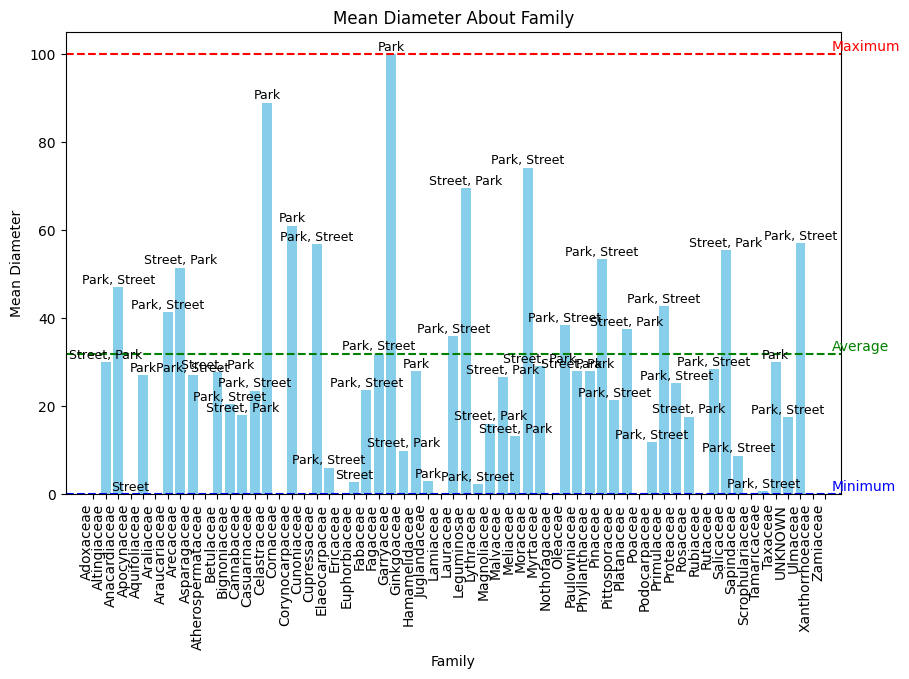

In [59]:
family_mean_diameter = tdf.groupby("Family")["Diameter Breast Height"].mean()
locations = tdf.groupby("Family")["Located in"].apply(lambda x: ', '.join(map(str, x.dropna().unique())))
family = family_mean_diameter.index
mean_diameter = family_mean_diameter.values
fig3 = plt.figure(figsize=(10, 6), num=4)
fig3_ax1 = fig3.add_subplot(111)
bars = fig3_ax1.bar(family, mean_diameter, color="skyblue")
for bar, location in zip(bars, locations):
        y_val = bar.get_height()
        fig3_ax1.text(bar.get_x() + bar.get_width() / 2, y_val + 0.1, location, ha='center', va='bottom', fontsize=9)
global_mean = family_mean_diameter.mean()
global_max = family_mean_diameter.max()
global_min = family_mean_diameter.min()
fig3_ax1.axhline(global_mean, color='green', linewidth=1.5, linestyle='--', label=f'Global Mean: {global_mean:.2f}')
fig3_ax1.axhline(global_max, color='red', linewidth=1.5, linestyle='--', label=f'Global Max: {global_max:.2f}')
fig3_ax1.axhline(global_min, color='blue', linewidth=1.5, linestyle='--', label=f'Global Min: {global_min:.2f}')
fig3_ax1.text(len(family)-0.5, global_mean, 'Average', color='green', va='bottom', fontsize=10, ha='left')
fig3_ax1.text(len(family)-0.5, global_max, 'Maximum', color='red', va='bottom', fontsize=10, ha='left')
fig3_ax1.text(len(family)-0.5, global_min, 'Minimum', color='blue', va='bottom', fontsize=10, ha='left')
fig3_ax1.set_title("Mean Diameter About Family")
fig3_ax1.set_xlabel("Family")
fig3_ax1.set_ylabel("Mean Diameter")
plt.xticks(rotation=90, ha='right')
#Influence of Plant Subjects on Plant Diameter Breast Height (DBH)


In [65]:
sorted_family_mean_diameter = family_mean_diameter.sort_values(ascending=False)
top_3_families = sorted_family_mean_diameter.head(3)
print("Top 3 families by mean diameter:")
print(top_3_families)
bottom_3_families = sorted_family_mean_diameter.tail(3)
tdf['Diameter Breast Height'].fillna(0, inplace=True)
print("Bottom 3 families by mean diameter:")
print(bottom_3_families)


Top 3 families by mean diameter:
Family
Garryaceae      100.00000
Celastraceae     89.00000
Moraceae         74.19021
Name: Diameter Breast Height, dtype: float64
Bottom 3 families by mean diameter:
Family
Lythraceae      2.272727
Tamaricaceae    0.636364
Apocynaceae     0.000000
Name: Diameter Breast Height, dtype: float64


/var/folders/w_/h6lh6wr515z2ry3b9mdk_7sr0000gn/T/ipykernel_13496/3951925759.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tdf['Diameter Breast Height'].fillna(0, inplace=True)


20


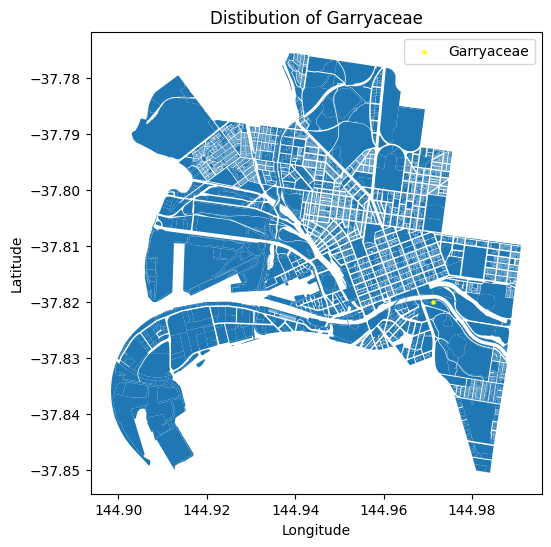

In [61]:
moreton_bay_fig_tdf = tdf[tdf['Family'] == 'Garryaceae']
print(moreton_bay_fig_tdf.size)
fig8 = plt.figure(figsize=(10, 6), num=7)
fig8_ax1 = fig8. add_subplot(111)
el_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig8_ax1)
fig8_ax1.scatter(moreton_bay_fig_tdf['Longitude'], moreton_bay_fig_tdf["Latitude"], c='yellow', s=5, label='Garryaceae')
fig8_ax1.set_title('Distibution of Garryaceae')
fig8_ax1.set_ylabel('Latitude')
fig8_ax1.set_xlabel('Longitude')
fig8_ax1.legend()
plt.show()

Here is the biggest tree of average diameter of Family


<function matplotlib.pyplot.show(close=None, block=None)>

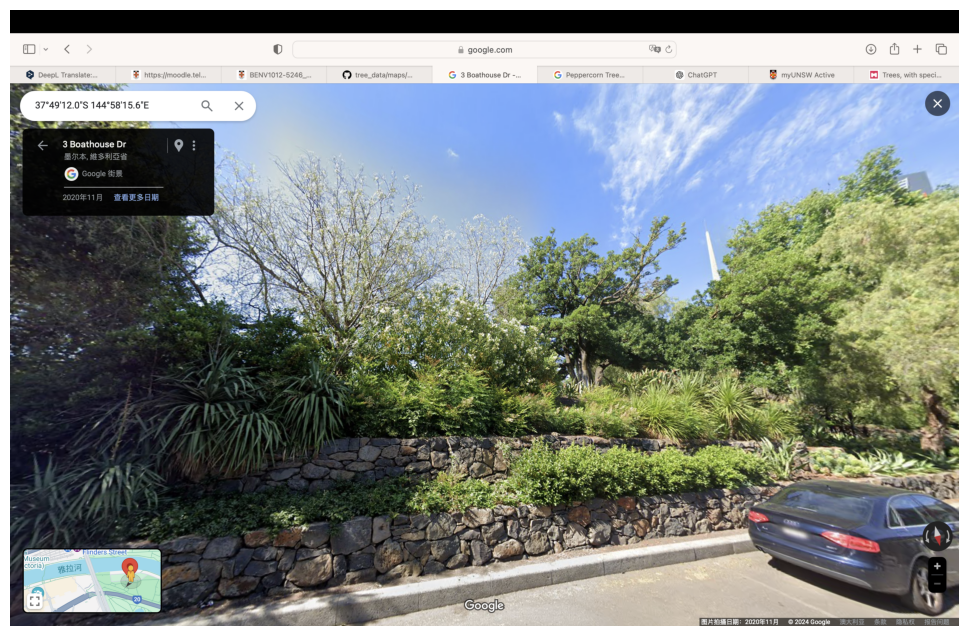

In [68]:
print("Here is the biggest tree of average diameter of Family")
img = mpimg.imread("Garryaceae.png")
plt. figure(figsize = (15,8))
plt. imshow(img)
plt. axis('off')
plt. show

Here is the top view of biggest tree of average diameter of Family


<function matplotlib.pyplot.show(close=None, block=None)>

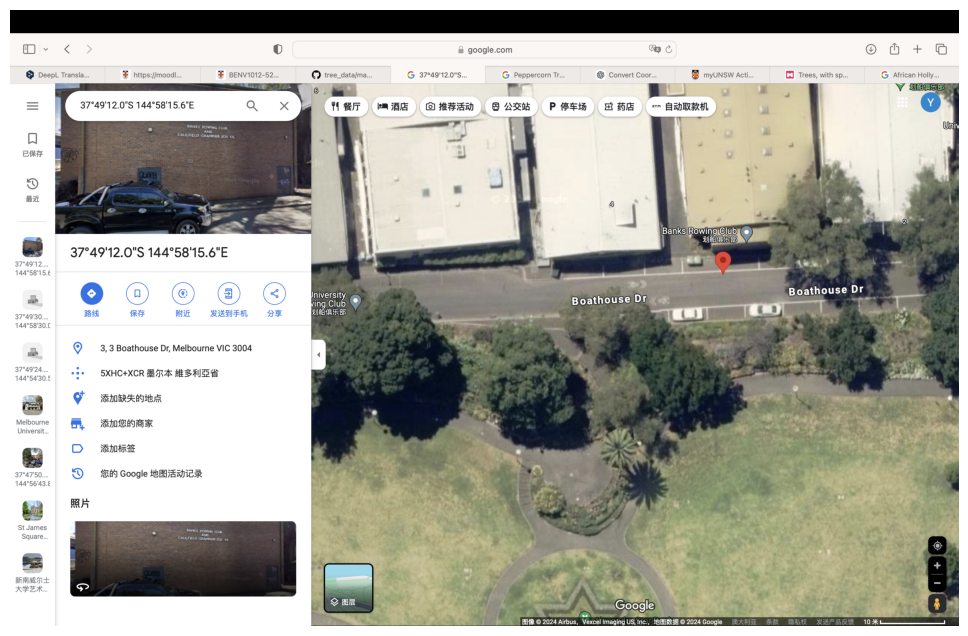

In [70]:
print("Here is the top view of biggest tree of average diameter of Family")
img = mpimg.imread("Garryaceae top view.png")
plt. figure(figsize = (15,8))
plt. imshow(img)
plt. axis('off')
plt. show

20


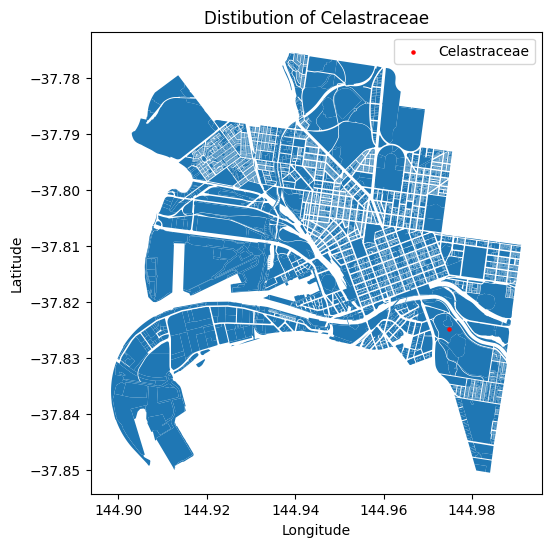

In [62]:
moreton_bay_fig_tdf = tdf[tdf['Family'] == 'Celastraceae']
print(moreton_bay_fig_tdf.size)
fig9 = plt.figure(figsize=(10, 6), num=7)
fig9_ax1 = fig9. add_subplot(111)
el_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig9_ax1)
fig9_ax1.scatter(moreton_bay_fig_tdf['Longitude'], moreton_bay_fig_tdf["Latitude"], c='red', s=5, label='Celastraceae')
fig9_ax1.set_title('Distibution of Celastraceae')
fig9_ax1.set_ylabel('Latitude')
fig9_ax1.set_xlabel('Longitude')
fig9_ax1.legend()
plt.show()

Here is the second biggest tree of average diameter of Family


<function matplotlib.pyplot.show(close=None, block=None)>

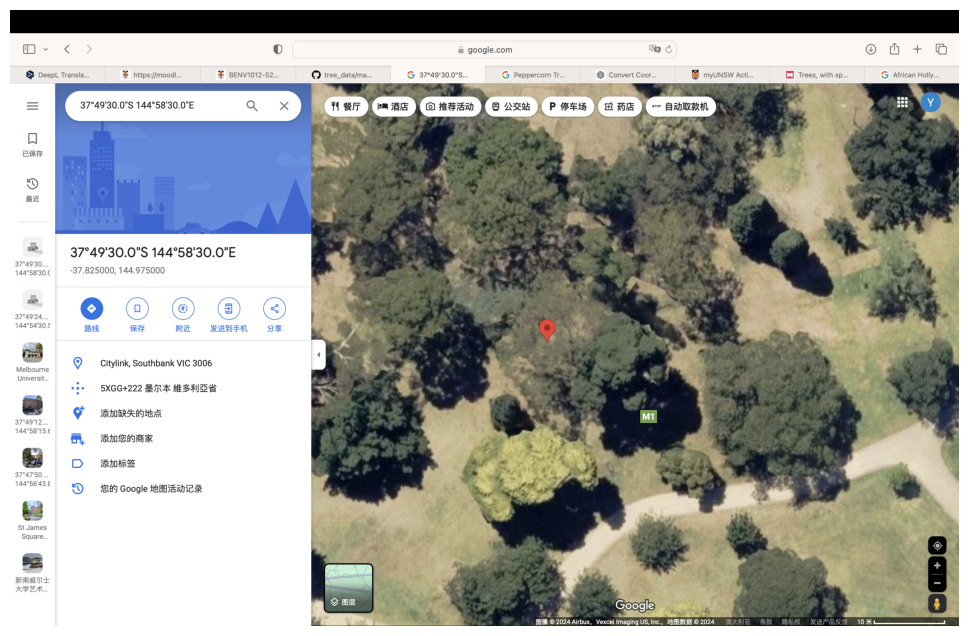

In [71]:
print("Here is the second biggest tree of average diameter of Family")
img = mpimg.imread("Celastraceae.png")
plt. figure(figsize = (15,8))
plt. imshow(img)
plt. axis('off')
plt. show

32780


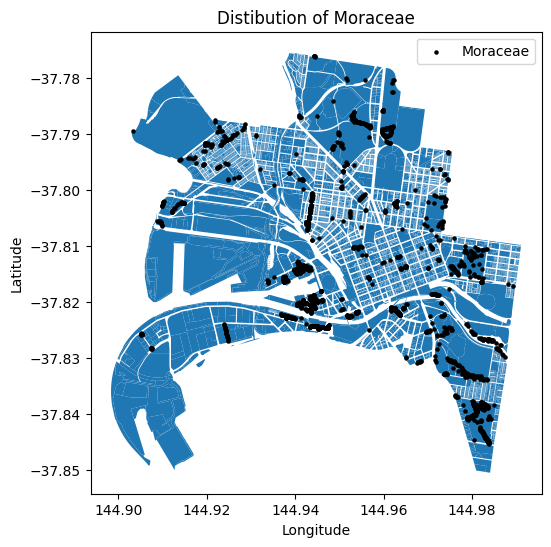

In [42]:
moreton_bay_fig_tdf = tdf[tdf['Family'] == 'Moraceae']
print(moreton_bay_fig_tdf.size)
fig10 = plt.figure(figsize=(10, 6), num=7)
fig10_ax1 = fig10. add_subplot(111)
el_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig10_ax1)
fig10_ax1.scatter(moreton_bay_fig_tdf['Longitude'], moreton_bay_fig_tdf["Latitude"], c='black', s=5, label='Moraceae')
fig10_ax1.set_title('Distibution of Moraceae')
fig10_ax1.set_ylabel('Latitude')
fig10_ax1.set_xlabel('Longitude')
fig10_ax1.legend()
plt.show()

2060


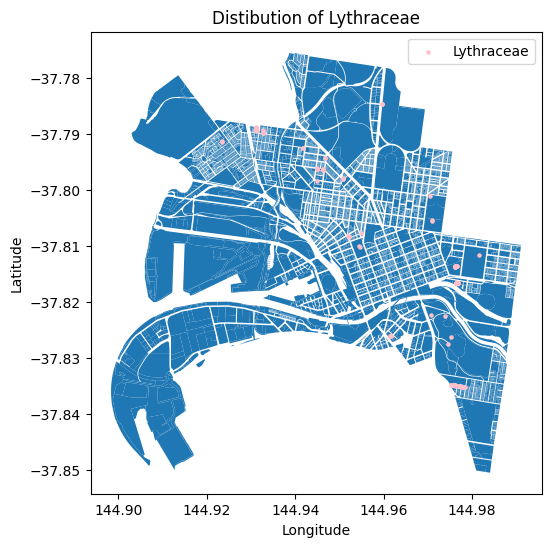

In [72]:
moreton_bay_fig_tdf = tdf[tdf['Family'] == 'Lythraceae']
print(moreton_bay_fig_tdf.size)
fig11 = plt.figure(figsize=(10, 6), num=7)
fig11_ax1 = fig11. add_subplot(111)
el_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig11_ax1)
fig11_ax1.scatter(moreton_bay_fig_tdf['Longitude'], moreton_bay_fig_tdf["Latitude"], c='pink', s=5, label='Lythraceae')
fig11_ax1.set_title('Distibution of Lythraceae')
fig11_ax1.set_ylabel('Latitude')
fig11_ax1.set_xlabel('Longitude')
fig11_ax1.legend()
plt.show()

320


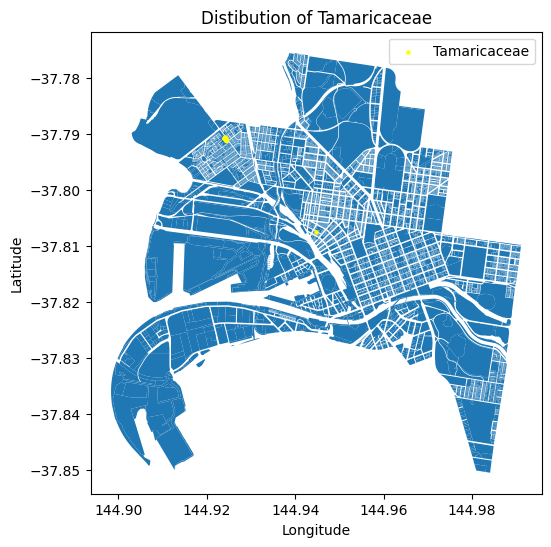

In [74]:
moreton_bay_fig_tdf = tdf[tdf['Family'] == 'Tamaricaceae']
print(moreton_bay_fig_tdf.size)
fig12 = plt.figure(figsize=(10, 6), num=7)
fig12_ax1 = fig12. add_subplot(111)
el_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig12_ax1)
fig12_ax1.scatter(moreton_bay_fig_tdf['Longitude'], moreton_bay_fig_tdf["Latitude"], c='yellow', s=5, label='Tamaricaceae')
fig12_ax1.set_title('Distibution of Tamaricaceae')
fig12_ax1.set_ylabel('Latitude')
fig12_ax1.set_xlabel('Longitude')
fig12_ax1.legend()
plt.show()

240


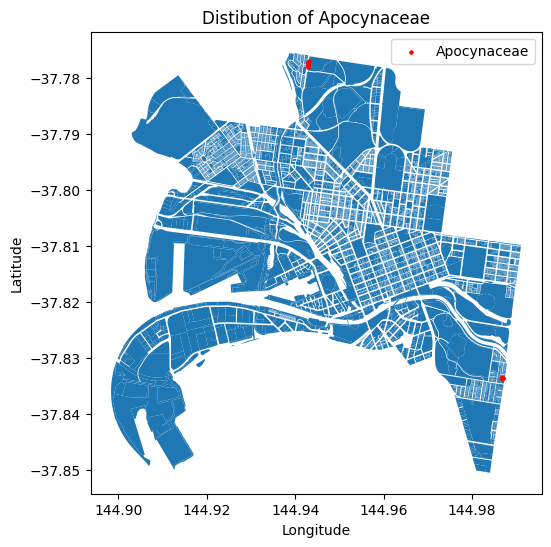

In [76]:
moreton_bay_fig_tdf = tdf[tdf['Family'] == 'Apocynaceae']
print(moreton_bay_fig_tdf.size)
fig13 = plt.figure(figsize=(10, 6), num=7)
fig13_ax1 = fig13. add_subplot(111)
el_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig13_ax1)
fig13_ax1.scatter(moreton_bay_fig_tdf['Longitude'], moreton_bay_fig_tdf["Latitude"], c='red', s=5, label='Apocynaceae')
fig13_ax1.set_title('Distibution of Apocynaceae')
fig13_ax1.set_ylabel('Latitude')
fig13_ax1.set_xlabel('Longitude')
fig13_ax1.legend()
plt.show()

Here is the smallest tree of average diameter of Family


<function matplotlib.pyplot.show(close=None, block=None)>

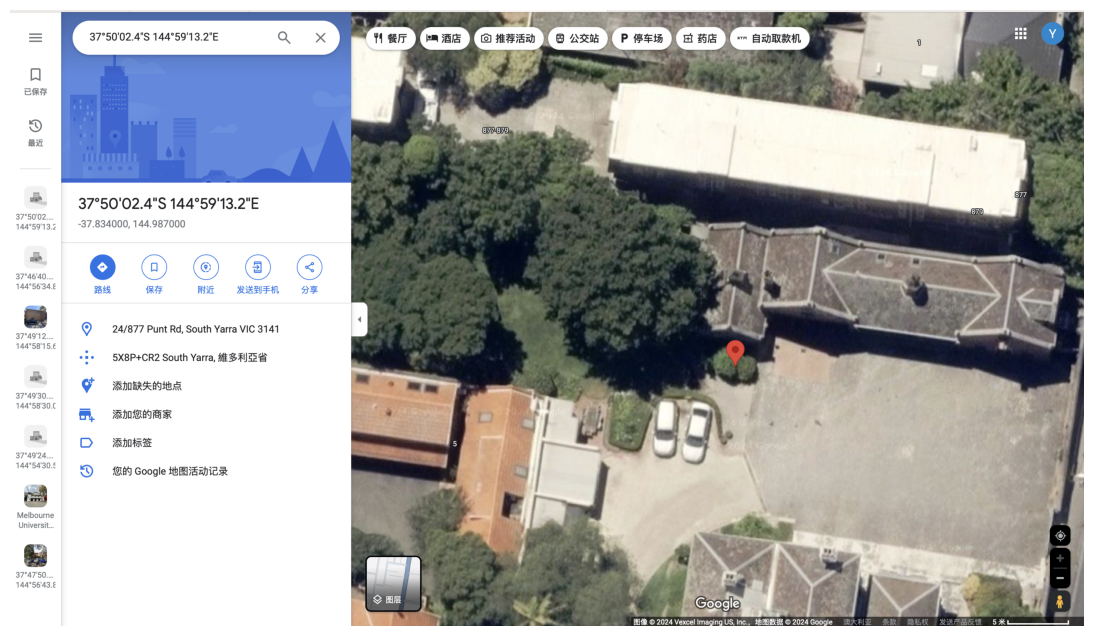

In [77]:
print("Here is the smallest tree of average diameter of Family")
img = mpimg.imread("Apocynaceae.png")
plt. figure(figsize = (15,8))
plt. imshow(img)
plt. axis('off')
plt. show

/var/folders/w_/h6lh6wr515z2ry3b9mdk_7sr0000gn/T/ipykernel_7568/3118897371.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_diameter_by_bin = tdf.groupby('Latitude_Bin')["Diameter Breast Height"].mean()


Text(0, 0.5, 'Mean Diameter')

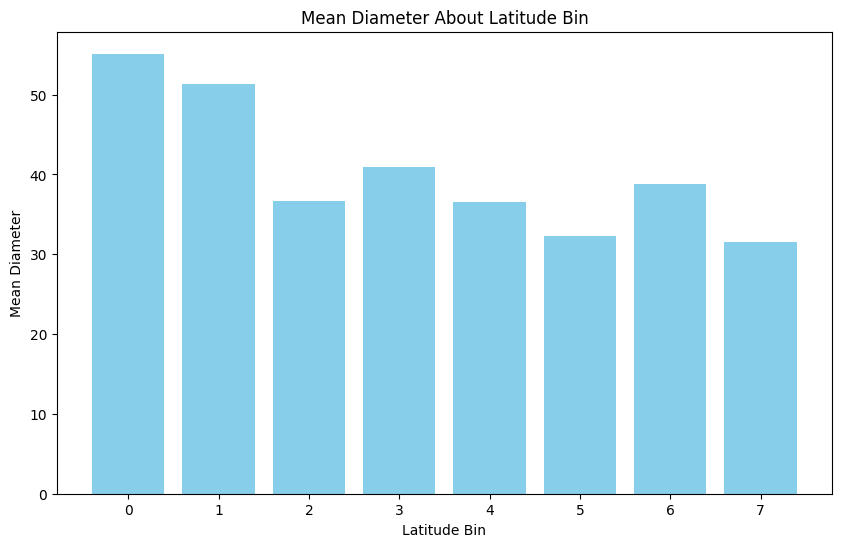

In [13]:
fig4 = plt.figure(figsize=(10, 6), num=5)
fig4_ax1 = fig4.add_subplot(111)
bin_width = 0.01
bins = np.arange(tdf["Latitude"].min(), tdf["Latitude"].max() + bin_width, bin_width)
tdf['Latitude_Bin'] = pd.cut(tdf["Latitude"], bins=bins)
mean_diameter_by_bin = tdf.groupby('Latitude_Bin')["Diameter Breast Height"].mean()
categories = mean_diameter_by_bin.index
values = mean_diameter_by_bin.values
x_labels = [f'{interval.left:.2f} to {interval.right:.2f}' for interval in categories]
x = range(len(categories))
fig4_ax1.bar(x, values, color='skyblue')
fig4_ax1.set_title("Mean Diameter About Latitude Bin")
fig4_ax1.set_xlabel("Latitude Bin")
fig4_ax1.set_ylabel("Mean Diameter")
#Effect of Latitude on the Size of Diameter Breast Height (DBH) in Plants.

/var/folders/w_/h6lh6wr515z2ry3b9mdk_7sr0000gn/T/ipykernel_7568/1487373819.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_diameter_by_bin = tdf.groupby('Longitude_Bin')["Diameter Breast Height"].mean()


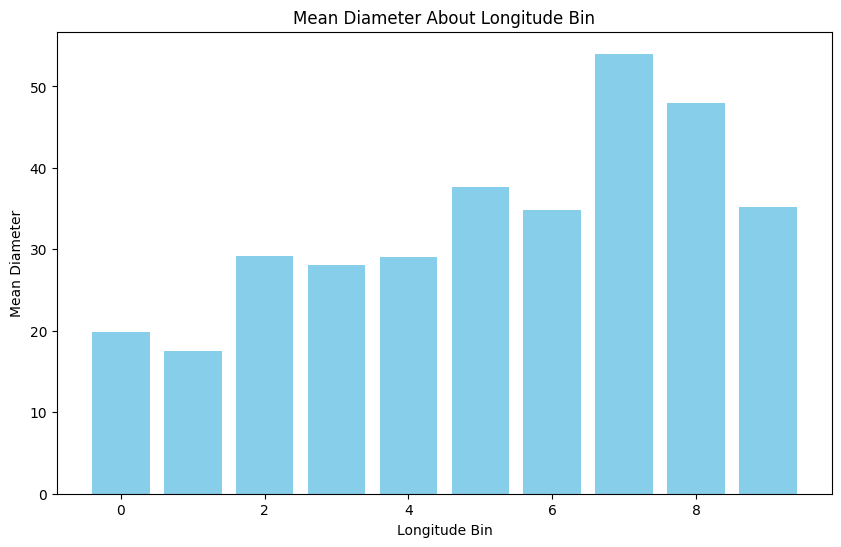

In [14]:
fig5 = plt.figure(figsize=(10, 6), num=6)
fig5_ax1 = fig5.add_subplot(111)
bin_width = 0.01
bins = np.arange(tdf["Longitude"].min(), tdf["Longitude"].max() + bin_width, bin_width)
tdf['Longitude_Bin'] = pd.cut(tdf["Longitude"], bins=bins)
mean_diameter_by_bin = tdf.groupby('Longitude_Bin')["Diameter Breast Height"].mean()
categories = mean_diameter_by_bin.index
values = mean_diameter_by_bin.values
x_labels = [f'{interval.left:.2f} to {interval.right:.2f}' for interval in categories]
x = range(len(categories))
fig5_ax1.bar(x, values, color='skyblue')
fig5_ax1.set_title("Mean Diameter About Longitude Bin")
fig5_ax1.set_xlabel("Longitude Bin")
fig5_ax1.set_ylabel("Mean Diameter")

plt.show()
#Effect of Longitude on the Size of Diameter Breast Height (DBH) in Plants.

`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.